**This notebook covers various parametric and non-parametric statistical tests commonly used in data analysis and hypothesis testing. The implementations are simple and demonstrated using the Titanic dataset.**

### **Confidence Intervals**

 a confidence interval gives you a sense of how accurate your sample estimate is likely to be, considering the variability that can occur when taking different samples from the same population.

 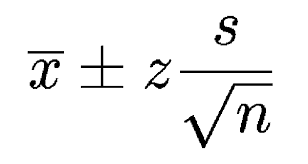

 x = sample mean

 z = number of standard deviations we have to traverse to capture the confidence interval

 s = standard deviation

 n = sample size

 We can use this to calculate the margin of error and a point estimate

 which gives our answer to be point estimate +- margin of error

Point estimates : estimate of population parameters based on sample data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

Using Titanic Dataset

* We will take a sample of the dataset.

* Calculate the sample mean.

* Get the confidence interval and then compare it with the population mean.

* Will repeat the same with multiple samples and calculate the percent of samples for which the population mean lies within the confidence interval

In [ ]:
titanic_link = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [ ]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Dropping all the null columns

In [ ]:
titanic_df = titanic_df.dropna(subset=['Age'])
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


The population size is 714

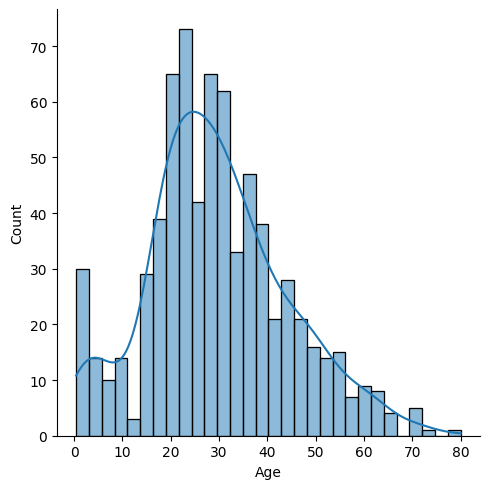

In [ ]:
sns.displot(titanic_df['Age'],kde=True,bins=30)

In [ ]:
population_mean = titanic_df['Age'].mean()

Lets take a sample of size 300

In [ ]:
sample_size = 300
sample_df = titanic_df.sample(n=sample_size)
sample_mean = sample_df['Age'].mean()
sample_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
616,617,0,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S


In [ ]:
Z = stats.norm.ppf(q=0.975)
std_dev = sample_df['Age'].std()
margin_of_error = Z * (std_dev / math.sqrt(sample_size))

In [ ]:
lower_bound = int(sample_mean - margin_of_error)
upper_bound = int(sample_mean + margin_of_error)
print(lower_bound,upper_bound)

28 31


According to this experiment we are 95% confident that the population mean age will lie between 28 and 31

Lets repeat this experiment for 500 samples and see for how many samples,the population means lies in the confidence interval of that sample

In [ ]:
def get_confidence_interval(df,sample_size,conf_interval):
  sample_df = df.sample(n = sample_size)
  sample_mean = sample_df['Age'].mean()
  Z = stats.norm.ppf(q=(1 + conf_interval)/2)
  std_dev = sample_df['Age'].std()
  margin_of_error = Z * (std_dev / math.sqrt(sample_size))
  lower_bound = int(sample_mean - margin_of_error)
  upper_bound = int(sample_mean + margin_of_error)
  return (lower_bound,upper_bound)

In [ ]:
def get_confidence_interval_percentage(population_mean,conf_interval):
  population_mean_age = int(population_mean)
  confidence_intervals = []
  in_between = []
  for i in range(0,10):
    confidence_interval = get_confidence_interval(titanic_df,300,conf_interval)
    lower_bound , upper_bound = confidence_interval
    confidence_intervals.append(confidence_interval)
    if population_mean_age >= lower_bound and population_mean_age <= upper_bound:
      in_between.append(1)
    else:
      in_between.append(0)
  correct_intervals = np.sum(in_between)
  percentage_correct = (correct_intervals / len(in_between)) * 100
  print(f"{percentage_correct:.2f}% of intervals contain the population age mean for confidence interval {conf_interval}")

Now lets see how many confidence intervals actually contain the population mean

In [ ]:
conf_ints = [0.15,0.25,0.45,0.55,0.75,0.85,0.95]
for interval in conf_ints:
  get_confidence_interval_percentage(population_mean,interval)

60.00% of intervals contain the population age mean for confidence interval 0.15
80.00% of intervals contain the population age mean for confidence interval 0.25
90.00% of intervals contain the population age mean for confidence interval 0.45
70.00% of intervals contain the population age mean for confidence interval 0.55
100.00% of intervals contain the population age mean for confidence interval 0.75
100.00% of intervals contain the population age mean for confidence interval 0.85
100.00% of intervals contain the population age mean for confidence interval 0.95


##Parametric Tests

Parametric tests assume that the data come from populations that follow a specific probability distribution (typically the normal distribution) and have certain characteristics (e.g., homogeneity of variances).

### **Hypothesis Testing**
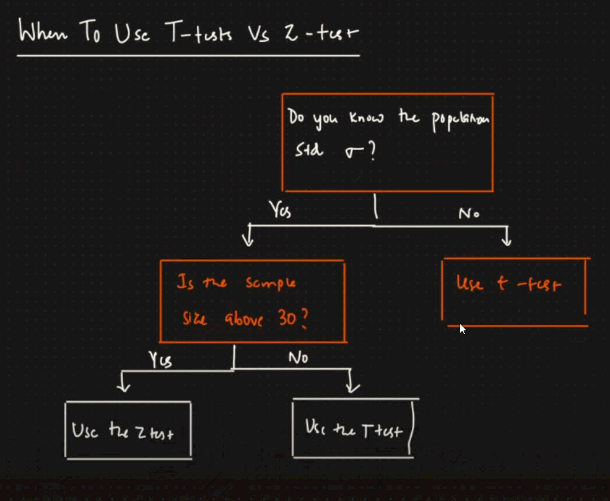

#### Z-Test

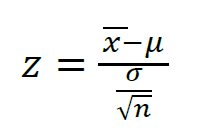

Let us conduct a Z-test with a null hypothesis that the average age of a titanic passenger is 26

In [ ]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_df = titanic_df.dropna(subset=['Age'])

We are taking a sample of 50 passengers

In [ ]:
sample_size = 50
sample_df = titanic_df.sample(n=sample_size)
sample_mean = titanic_df['Age'].mean()

In [ ]:
std_dev = titanic_df['Age'].std()
population_mean = 26

With a confidence interval of 0.95 the Z value should lie between -1.96 and +1.96

In [ ]:
Z_value = (sample_mean - population_mean) / (std_dev / math.sqrt(sample_size))
Z_value

1.800620695272482

Since the Z value is between -1.96 and +1.96 , we fail to reject the null hypothesis

#### T-Test
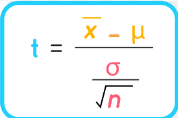

Degree of freedom = n-1

In T test we don't have the std deviation of the population

Let us conduct a T-test with a null hypothesis that the average age of a titanic passenger is 26

In [ ]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_df = titanic_df.dropna(subset=['Age'])

T value for 95% confidence interval is 2.045


In [ ]:
sample_size = 20
sample_df = titanic_df.sample(n=sample_size)
sample_mean = titanic_df['Age'].mean()
std_dev = sample_df['Age'].std()
population_mean = 26
T_value = (sample_mean - population_mean) / (std_dev / math.sqrt(sample_size))
T_value

1.393106554584822

Therefore, we fail to reject the null hypothesis

#### ANOVA TEST

ANOVA, or Analysis of Variance, is a statistical test used to compare the means of three or more groups to determine if they are significantly different from each other.

Assumption :
* The data within each group or population should be normally distributed. Departures from normality can affect the accuracy of the test.

* absence of outliers
* Homogenity of variance : each population has same variance , the population variance in different levels of each indivdiual variable is same
* samples are independent and random

Types of ANOVA:
* One way ANOVA: One factor with atleast 2 levels which are independent
* Repeated measure ANOVA: One factor with atleast 2 levels are dependent
* Factorial ANOVA: two or more factors (each with atleast 2 levels) each of which can be independent or dependent

It is performed on F distribution

* Null Hypothesis : The population means of all groups are equal.
* Alternative Hypothesis : At least one of the population means of the groups is different

Lets us conduct an ANOVA test to find out whether there is a relation between fare and survival

Null Hypothesis : Mean fare for survived and not survivied are equal

Alternate Hypothesis : Mean is different

In [ ]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df = titanic_df.dropna(subset=['Fare','Survived'])

In [ ]:
survivedFare = titanic_df[titanic_df['Survived'] == 1]['Fare']
notsurvivedFare = titanic_df[titanic_df['Survived'] == 0]['Fare']

In [ ]:
f_value,p_value = stats.f_oneway(notsurvivedFare,survivedFare)
f_value,p_value

(63.03076422804448, 6.120189341921873e-15)

Since P value is very less, we reject the null hypothesis, it means there is no relation between fare and survival

### Variance Ratio Test


The Variance Ratio Test, also known as the Fisher's F-test or Bartlett's test, is used to assess whether the variances of two or more groups or populations are equal.

Assumptions :
* Normality: The data within each group or population should be normally distributed. Departures from normality can affect the accuracy of the test.
* Homogeneity of Variances: The variances of the different groups or populations should be approximately equal. In other words, the variability within each group should be similar across all groups.
* Independence: The observations within each group or population should be independent of each other. This assumption ensures that the observations are not influenced by each other and are representative of the population.

let's consider a hypothetical scenario where we want to compare the ages of passengers across different ticket classes (1st class, 2nd class, and 3rd class) to see if there is a significant difference in the variance of ages between these groups.

Null Hypothesis : There is no significant difference in variance of age across different ticket classes

Alternate Hypothesis : There is a significant difference in variance of age atleast across one ticket class

In [ ]:
from scipy.stats import bartlett
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_df = titanic_df.dropna(subset=['Age','Pclass'])
ages_by_class = [titanic_df[titanic_df['Pclass'] == i]['Age'] for i in range(1, 4)]
statistic, p_value = bartlett(*ages_by_class)
print("Bartlett's Test Statistic:", statistic)
print("P-value:", p_value)

Bartlett's Test Statistic: 7.818000705428391
P-value: 0.020060544510697085


Since P-value is less than 0.05 we reject the null hypothesis, meaning that There is a significant difference in variance of age atleast across one ticket class

## Non Parametric tests

Non-parametric tests make fewer assumptions about the underlying population distribution. They do not require the data to follow a specific distribution or have specific characteristics.

#### Chi Square Test

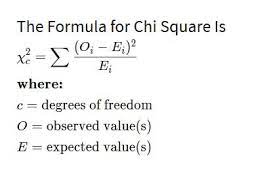

It is a non parametric test that is performed on categorical data

In [ ]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let us find out if there is any relation between survived and Passenger class

Null hypothesis : there is no relation between them

Alternate hypothesis : there is a relation

In [ ]:
titanic_df = titanic_df.dropna(subset=['Pclass','Survived'])

In [ ]:
crosstab = pd.crosstab(titanic_df['Pclass'],titanic_df["Survived"],margins=True,margins_name='Total')
row_totals = crosstab['Total'][:-1]
col_totals = crosstab.loc['Total'][:-1]

In [ ]:
crosstab

Survived,0,1,Total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
Total,549,342,891


In [ ]:
total = len(titanic_df)
total

891

In [ ]:
expected = np.outer(np.array(row_totals),np.array(col_totals)) / total
expected

array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]])

In [ ]:
observed = crosstab.iloc[:-1, :-1].values
observed

array([[ 80, 136],
       [ 97,  87],
       [372, 119]])

In [ ]:
final = (observed-expected)**2 / (expected)
final

array([[21.17834078, 33.99681021],
       [ 2.3647388 ,  3.79602807],
       [15.94966358, 25.60340732]])

In [ ]:
np.sum(final)

102.88898875696056

In [ ]:
dof = (len(row_totals)-1) * (len(col_totals)-1)
dof

2

Chi square value for dof = 2 and significance level = 0.05 is 5.99

since our chi square value is bigger than 5.99 we reject the null hypothesis

Performing the same experiment using the scipy library

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
chi2, p, dof, expected

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

Conlusion we can say that there is a relation between survival and pclass

### Mann Whitney U Test
The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric statistical test used to compare two independent groups to determine if they have different population medians.

Assumptions :
* Independent samples
* Random sampling
* Ordinal or interval data
* Equal shapes of distributions
* Similar variances

Null Hypothesis : median ages of male and female are same

Alternate Hypotehesis : they are not same

In [ ]:
from scipy.stats import mannwhitneyu
titanic_data = pd.read_csv(titanic_link)

male_ages = titanic_data[titanic_data['Sex'] == 'male']['Age'].dropna()
female_ages = titanic_data[titanic_data['Sex'] == 'female']['Age'].dropna()

statistic, p_value = mannwhitneyu(male_ages, female_ages)
print("Mann-Whitney U statistic:", statistic , "P : value" , p_value)

Mann-Whitney U statistic: 65020.5 P : value 0.026087746884279634


Since P value is less than 0.05, we will reject the null hypothesis


Statistical Tests Covered:

Parametric Tests:

* T-test
* Z-Test
* ANOVA Test
* Variance Ratio Test

Non-parametric Tests:

* Chi-square Test
* Mann Whitney U Test